# <font color=#219ebc>Recommandation de films - Nettoyage </font>

# Sommaire
* [Configuration](#Configuration)
* [Chargement des données](#Chargement-des-donnees)
* [Nettoyage](#Nettoyage)
    * [Valeurs manquantes](#Valeurs-manquantes)
    * [Dedoublonnage](#Dedoublonnage)
    * [Préparation des données](#Preparation-des-donnees)
    * [Binarisation](#Binarisation)
        * [Genres](#Genres)
        * [Intrigues](#Intrigues)
    * [Boxplots](#Boxplots)
    * [Histogrammes](#Histogrammes)
    * [Correlations](#Correlations)
* [Ecriture des données](#Ecriture-des-donnees)

## <font color=#fb8500>Configuration</font>

On configure l'affichage de matplotlib en utilisant seaborn, cela nous permettra d'avoir un joli affichage et de profiter des performances de matplotlib

In [1]:
import matplotlib as mplt

import seaborn as sns
sns.set(font='Franklin Gothic Book',rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

# use the .set_context() method to fine-tune font size settings.
#sns.set_context("notebook", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":14})

mplt.font_manager._rebuild()

## <font color=#fb8500>Chargement des donnees</font>

In [2]:
import time
start=time.time()

In [3]:
import pandas as pd

df=pd.read_csv("../Dataset/movie_metadata.csv",sep=",",encoding="utf-8")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## <font color=#fb8500>Nettoyage</font>

### <font color=#ffb703>Valeurs manquantes</font>

In [5]:
sNombreValeursManquantes=df.isna().sum()
sNombreValeursManquantes

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
import numpy as np

nombreIndividus=len(df)
sPourcentageValeursManquantes=(np.round(sNombreValeursManquantes/nombreIndividus*100,2)).sort_values()
sPourcentageValeursManquantes

cast_total_facebook_likes     0.00
imdb_score                    0.00
movie_imdb_link               0.00
num_voted_users               0.00
movie_title                   0.00
genres                        0.00
movie_facebook_likes          0.00
country                       0.10
actor_1_facebook_likes        0.14
actor_1_name                  0.14
language                      0.24
actor_2_facebook_likes        0.26
actor_2_name                  0.26
facenumber_in_poster          0.26
duration                      0.30
color                         0.38
num_user_for_reviews          0.42
actor_3_facebook_likes        0.46
actor_3_name                  0.46
num_critic_for_reviews        0.99
director_facebook_likes       2.06
director_name                 2.06
title_year                    2.14
plot_keywords                 3.03
content_rating                6.01
aspect_ratio                  6.52
budget                        9.76
gross                        17.53
dtype: float64

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


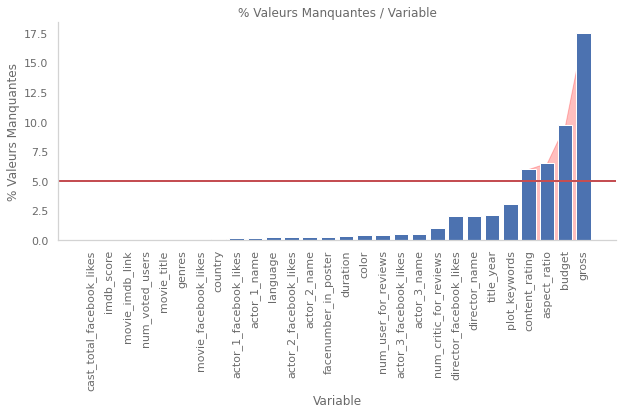

In [7]:
from matplotlib import pyplot as plt
limiteValeursManquantes=5
# taille du graphique
#plt.rcParams['font.size'] = '100.0'
plt.rcParams["figure.figsize"] = (10,4)
# bar chart
plt.bar(sPourcentageValeursManquantes.index,sPourcentageValeursManquantes)
# ligne limite des 6% de valeurs manquantes
plt.axhline(limiteValeursManquantes, color='r',lw=2)
plt.fill_between(sPourcentageValeursManquantes.index,sPourcentageValeursManquantes,where=sPourcentageValeursManquantes>limiteValeursManquantes,color="red",alpha=.25)

# rotation à la verticale des libelles
plt.xticks(rotation=90)

# Titre et libelles
plt.title('% Valeurs Manquantes / Variable')
plt.xlabel('Variable')
plt.ylabel('% Valeurs Manquantes')

plt.show()

Les variables *gross (CA brut)* et *budget* sont celles présentant le plus de variables manquantes.\
Cependant, elles ont au plus que moins de 20% de valeurs manquantes, et 80% de valeurs qui peuvent être utiles pour caracteriser un film => on choisit de les garder pour la suite.

In [8]:
# identification des colonnes numériques et qualitatives
colonnesQuantitatives=df.select_dtypes(np.number).columns.tolist()
colonnesQualitatives=df.select_dtypes('O').columns.tolist()

### <font color=#ffb703>Dedoublonnage</font>

In [9]:
# Avant dédoublonnage
pd.set_option('display.min_rows', 12)
(df.groupby(['movie_title','director_name']).size().reset_index(name='count')).sort_values(by='count',ascending=False)

,movie_title,director_name,count
489,Ben-Hur,Timur Bekmambetov,3
1558,Halloween,John Carpenter,3
1679,Home,Tim Johnson,3
4602,Victor Frankenstein,Paul McGuigan,3
2618,Pan,Joe Wright,3
1988,King Kong,Peter Jackson,3
...,...,...,...
1632,Hereafter,Clint Eastwood,1
1631,Here on Earth,Mark Piznarski,1
1630,Here Comes the Boom,Frank Coraci,1


In [10]:
# identification(masque) des lignes en doublons sur le couple film/realisateur
maskDuplicates=df.duplicated(subset=['movie_title','director_name'])
dfUnique=df[~maskDuplicates]

In [11]:
# Après dédoublonnage
pd.set_option('display.min_rows', 10)
(dfUnique.groupby(['movie_title','director_name']).size().reset_index(name='count')).sort_values(by='count',ascending=False)

,movie_title,director_name,count
0,#Horror,Tara Subkoff,1
3218,Spider-Man,Sam Raimi,1
3216,Spider-Man 2,Sam Raimi,1
3215,Spice World,Bob Spiers,1
3214,Sphinx,Franklin J. Schaffner,1
...,...,...,...
1605,He Got Game,Spike Lee,1
1604,Haywire,Steven Soderbergh,1
1603,Hayride,Terron R. Parsons,1
1602,Hav Plenty,Christopher Scott Cherot,1


### <font color=#ffb703>Preparation des donnees</font>

On va remplacer les caracteres speciaux dans "genres" pour faciliter la categorisation des films ultérieuremnt.\
Et les stocker dans un dataframe dedié (par copy deep).

In [12]:
import re
import copy

dfGenres=copy.deepcopy(dfUnique[['genres']])
f = lambda x: (re.sub('Sci-Fi','Sci_Fi',str(x)))
dfGenres=dfGenres.applymap(f)
f = lambda x: (re.sub('Film-Noir','Film_Noir',str(x)))
dfGenres=dfGenres[['genres']].applymap(f)
f = lambda x: (re.sub('Reality-TV','Reality_TV',str(x)))
dfGenres=dfGenres[['genres']].applymap(f)
f = lambda x: (re.sub('Game-Show','Game_Show',str(x)))
dfGenres=dfGenres[['genres']].applymap(f)

dfGenres['genres'].head(20)

0                       Action|Adventure|Fantasy|Sci_Fi
1                              Action|Adventure|Fantasy
2                             Action|Adventure|Thriller
3                                       Action|Thriller
4                                           Documentary
5                               Action|Adventure|Sci_Fi
6                              Action|Adventure|Romance
7     Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                               Action|Adventure|Sci_Fi
9                      Adventure|Family|Fantasy|Mystery
10                              Action|Adventure|Sci_Fi
11                              Action|Adventure|Sci_Fi
12                                     Action|Adventure
13                             Action|Adventure|Fantasy
14                             Action|Adventure|Western
15                      Action|Adventure|Fantasy|Sci_Fi
16                      Action|Adventure|Family|Fantasy
17                              Action|Adventure

On reformate les noms composés dans "plot_keywords" pour conserver les mots clés comme "marriage_proposal" ou "fairy_tale" afin de faciliter la catégorisation des films ultérieurement.\
Et les stocker dans un dataframe dedié (par copy deep).

In [13]:
import re
import copy

dfPlot=copy.deepcopy(dfUnique[['plot_keywords']])
f = lambda x: (re.sub(' ','_',str(x)))
dfPlot=dfPlot.applymap(f)
dfPlot['plot_keywords'].head(20)

0                avatar|future|marine|native|paraplegic
1     goddess|marriage_ceremony|marriage_proposal|pi...
2                   bomb|espionage|sequel|spy|terrorist
3     deception|imprisonment|lawlessness|police_offi...
4                                                   nan
5     alien|american_civil_war|male_nipple|mars|prin...
6             sandman|spider_man|symbiote|venom|villain
7     17th_century|based_on_fairy_tale|disney|flower...
8     artificial_intelligence|based_on_comic_book|ca...
9                      blood|book|love|potion|professor
10    based_on_comic_book|batman|sequel_to_a_reboot|...
11    crystal|epic|lex_luthor|lois_lane|return_to_earth
12    action_hero|attempted_rape|bond_girl|official_...
13    box_office_hit|giant_squid|heart|liar's_dice|m...
14                horse|outlaw|texas|texas_ranger|train
15    based_on_comic_book|british_actor_playing_amer...
16    brother_brother_relationship|brother_sister_re...
17      alien_invasion|assassin|battle|iron_man|

In [14]:
import copy
import copy

dfCleaned=copy.deepcopy(dfUnique)

dfCleaned['genres'].update(dfGenres['genres'])
dfCleaned['plot_keywords'].update(dfPlot['plot_keywords'])

In [15]:
import re

# nettoyage (suppression des caracteres speciaux + minuscules)
subpattern1=r"[-|:]" # caracteres speciaux a nettoyer
subpattern2=r"'s" # marque d'appartenance à nettoyer
pattern=r'|'.join((subpattern1, subpattern2)) # pattern final
f = lambda x: (re.sub(pattern,' ',str(x))).lower()
dfQualitativesUniformisees=(dfCleaned[colonnesQualitatives].applymap(f))
dfQualitativesUniformisees.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,color,james cameron,joel david moore,action adventure fantasy sci_fi,cch pounder,avatar,wes studi,avatar future marine native paraplegic,http //www.imdb.com/title/tt0499549/?ref_=fn_t...,english,usa,pg 13
1,color,gore verbinski,orlando bloom,action adventure fantasy,johnny depp,pirates of the caribbean at world end,jack davenport,goddess marriage_ceremony marriage_proposal pi...,http //www.imdb.com/title/tt0449088/?ref_=fn_t...,english,usa,pg 13
2,color,sam mendes,rory kinnear,action adventure thriller,christoph waltz,spectre,stephanie sigman,bomb espionage sequel spy terrorist,http //www.imdb.com/title/tt2379713/?ref_=fn_t...,english,uk,pg 13
3,color,christopher nolan,christian bale,action thriller,tom hardy,the dark knight rises,joseph gordon levitt,deception imprisonment lawlessness police_offi...,http //www.imdb.com/title/tt1345836/?ref_=fn_t...,english,usa,pg 13
4,nan,doug walker,rob walker,documentary,doug walker,star wars episode vii the force awakens ...,nan,nan,http //www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,nan,nan


### <font color=#ffb703>Binarisation</font>

#### <font color=#8ecae6>Genres</font>

On constate que la variable categorielle 'genres' contient les valeurs qui permettent de categoriser les films => on les binarise pour pouvoir utiliser cette information

In [16]:
dfGenres.head(5)

,genres
0,Action|Adventure|Fantasy|Sci_Fi
1,Action|Adventure|Fantasy
2,Action|Adventure|Thriller
3,Action|Thriller
4,Documentary


In [17]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

# variable genre: ventilation par type
dfTemp=dfQualitativesUniformisees[['movie_title','director_name','genres']]

cols = ['movie_title','director_name']
dfDummyGenres=pd.get_dummies(dfTemp.set_index(cols).genres.str.split(' ', expand=True).stack())\
      .groupby(level=cols).sum().astype(int)
#dfGenres

In [18]:
dfGenres=dfQualitativesUniformisees[['movie_title','director_name','genres']].merge(dfDummyGenres,on=['movie_title','director_name'])
dfGenres=dfGenres.drop(['movie_title','director_name','genres'],axis=1)
dfGenres.head(5)

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film_noir,game_show,history,horror,music,musical,mystery,news,reality_tv,romance,sci_fi,short,sport,thriller,war,western
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
dfCleaned.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci_Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage_ceremony|marriage_proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police_offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,nan,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### <font color=#8ecae6>Intrigues</font>

On constate que la variable categorielle 'plot' contient les valeurs qui permettent de categoriser l'intrigue des films => on les binarise pour pouvoir utiliser cette information

In [20]:
pd.set_option('display.max_columns', 30)  
pd.set_option('display.expand_frame_repr', False)

# variable plot_keywords: ventilation par type
dfTemp=dfQualitativesUniformisees[['movie_title','director_name','plot_keywords']]

cols = ['movie_title','director_name']
dfDummyPlots=pd.get_dummies(
    dfTemp.set_index(cols).plot_keywords \
      .str.split(' ', expand=True).stack())\
      .groupby(level=cols).sum().astype(int)
#dfPlots

In [21]:
pd.options.display.max_columns=1000
dfPlots=dfQualitativesUniformisees[['movie_title','director_name','plot_keywords']].merge(dfDummyPlots,on=['movie_title','director_name'])
dfPlots=dfPlots.drop(['movie_title','director_name','plot_keywords'],axis=1)
dfPlots.head(5)

,,1000000_b.c.,10_year_old,1190s,12_step_program,12_year_old,12_year_time_span,12th_century,13_year_old,13_year_olds,13th_birthday,14_year_old,14th_century,1520s,15_year_old,15th_birthday,15th_century,16_year_old,16th_century,1770s,17th_century,1800s,1810s,1830s,1850s,1860s,1880s,1890s,18_wheeler,18th_birthday,18th_century,1910s,1920s,1930s,1940s,1950s,1955_chevrolet,1959_cadillac,1960s,1969_dodge_charger,1970s,1980s,1988_winter_olympics,1990s,19th_century,1st_century,1st_century_b.c.,2000s,2010s,2020s,2030s,20_years_later,20th_century,21_year_old,21st_birthday,21st_century,22_year_old,22nd_century,23_year_time_span,23rd_century,27th_century,2nd_century,30_year_old,35_mm_digital_camera,3_dimensional,3d,3d_in_title,40_year_old,40th_birthday,41st_century,50s,5th_century,70mm_film,80s_action,8_year_old,911_operator,9_year_old,_a_midsummer_night,_ark,_block,_book,_boot,_box,_boyfriend,_clothing_store,_coriolanus,_daughter,_day,_dialogue,_dice,_disease,_dream,_eve,_first_film,_grave,_hamlet,_head,_head_underwater,_house,_hysteria,_land,_land_army,_lover_murdered_by_husband,_memory,_monster,_othello,_picture_shown_in_credits,_point_of_view,_point_of_view_camera_shot,_princess_ida,_prison,_romeo_and_juliet,_self_in_a_mirror,_shirt,_stone,_syndrome,_tv_show,_vineyard,_watch,_wrists,a_cappella,abandoned,abandoned_asylum,abandoned_building,abandoned_by_mother,abandoned_hospital,abandoned_hotel,abandoned_house,abbreviation_in_title,abdication,abduction,able_to_see_the_dead,aborigine,abortion,abortion_clinic,abraham,absent_father,abstract,absurd_humor,abu_dhabi,abu_ghraib,abuse,abuse_of_power,abusive_boyfriend,abusive_father,abusive_husband,abusive_marriage,abusive_mother,abusive_parent,abusive_relationship,abusive_stepfather,academic_probation,academy_award,acceptance,accident,accidental_death,accidental_killing,accidental_kiss,accidental_shooting,accountant,accused_of_witchcraft,acid_trip,acorn,acrobat,acronym_in_title,acrophobia,act_of_kindness,acting,action_figure,action_hero,action_heroine,activist,actor,actor_director_writer,actor_name_in_title,actor_playing_himself,actor_playing_multiple_roles,actor_voicing_multiple_characters,actress,actress_name_in_title,actress_playing_herself,actress_shares_first_name_with_character,actual_animal_killed,adaptation_directed_by_original_author,addict,addiction,address_as_title,adidas,admiral,adolescence,adopted_daughter,adopted_son,adoption,adult_actor_playing_minor,adult_as_child,adult_child_friendship,adult_diaper,adult_entertainment_industry,adult_humor,adult_returns_home,adulterous_wife,adultery,adventurer,advertising,advertising_executive,advice,aerialist,affair,affection,afghanistan,africa,african,african_american,african_american_gangster,african_american_lesbian,african_american_policeman,african_american_protagonist,african_american_stereotype,african_americans,african_national_congress,after_dark,after_dark_horrorfest,afterlife,age_difference,agent,aging,aging_rocker,agoraphobia,agriculture,aids,air_cavalry,air_marshal,air_raid,air_traffic_control,air_traffic_controller,airborne_troops,airfield,airline,airplane,airport,airport_security,al_qaeda,alabama,alamut,alaska,albanian,alcatraz,alcohol,alcoholic,alcoholic_drink,alcoholic_father,alcoholism,alderman,algeria,algerian,algerian_war,alibi,alice_in_wonderland,alien,alien_abduction,alien_contact,alien_creature,alien_friendship,alien_infection,alien_invasion,alien_life_form,alien_planet,alien_probe,alien_race,alien_space_craft,alienation,all_girl_band,alliance,allies,alligator,alliterative_title,alone,alopecia,alter_ego,altering_history,alternate_history,alternate_reality,alternate_timeline,alternate_universe,alternate_world,alternative_comedy,alternative_energy,alternative_reality,alzheimer,amateur,amateur_detective,amateur_film,amateur_radio,amateur_theater,amazing_grace_the_hymn,amazon,ambassador,ambiguity,ambiguous_ending,ambulance,ambulance_driver,ambush,american,american_abroad,american_actor_playing_foreigner,american_actress_playin

Vérifions s'il y a des correlations entre les genres

In [22]:
matriceCorrelation=(dfGenres.dropna()).corr()
matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film_noir,game_show,history,horror,music,musical,mystery,news,reality_tv,romance,sci_fi,short,sport,thriller,war,western
action,1.00,0.31,-0.02,-0.09,-0.17,0.15,-0.08,-0.23,-0.06,0.06,-0.02,-0.01,-0.01,-0.06,-0.10,-0.08,-0.05,-0.01,-0.01,-0.17,0.28,-0.02,-0.04,0.28,0.04,0.03
adventure,0.31,1.00,0.30,-0.07,-0.03,-0.15,-0.06,-0.24,0.31,0.27,-0.02,-0.01,0.01,-0.11,-0.07,0.02,-0.06,-0.01,-0.01,-0.12,0.23,0.00,-0.05,-0.03,0.01,0.05
animation,-0.02,0.30,1.00,-0.04,0.16,-0.09,-0.03,-0.17,0.54,0.25,-0.01,-0.00,-0.04,-0.07,-0.01,0.13,-0.05,-0.01,-0.00,-0.07,0.06,-0.01,-0.01,-0.12,-0.03,-0.01
biography,-0.09,-0.07,-0.04,1.00,-0.14,-0.01,0.04,0.21,-0.07,-0.08,-0.01,-0.00,0.30,-0.09,0.09,0.02,-0.08,-0.01,-0.01,-0.02,-0.09,-0.01,0.15,-0.09,0.07,0.00
comedy,-0.17,-0.03,0.16,-0.14,1.00,-0.08,-0.09,-0.25,0.21,0.04,-0.03,-0.01,-0.14,-0.15,0.04,0.05,-0.19,-0.02,0.01,0.18,-0.09,0.00,0.00,-0.36,-0.12,-0.06
crime,0.15,-0.15,-0.09,-0.01,-0.08,1.00,-0.05,0.07,-0.13,-0.15,0.03,-0.01,-0.06,-0.11,-0.06,-0.05,0.12,0.01,-0.01,-0.12,-0.13,-0.01,-0.08,0.35,-0.08,-0.01
documentary,-0.08,-0.06,-0.03,0.04,-0.09,-0.05,1.00,-0.13,-0.05,-0.05,-0.01,-0.00,0.03,-0.06,0.08,-0.03,-0.05,0.16,-0.00,-0.08,-0.05,0.04,0.04,-0.10,0.02,-0.02
drama,-0.23,-0.24,-0.17,0.21,-0.25,0.07,-0.13,1.00,-0.18,-0.20,0.01,-0.01,0.17,-0.23,0.05,-0.00,0.00,-0.01,-0.00,0.16,-0.20,-0.03,0.07,-0.03,0.16,0.01
family,-0.06,0.31,0.54,-0.07,0.21,-0.13,-0.05,-0.18,1.00,0.31,-0.01,-0.00,-0.06,-0.11,0.02,0.17,-0.07,-0.01,-0.01,-0.05,0.02,0.01,0.03,-0.20,-0.07,-0.02
fantasy,0.06,0.27,0.25,-0.08,0.04,-0.15,-0.05,-0.20,0.31,1.00,-0.01,-0.01,-0.07,0.09,-0.03,0.06,-0.01,-0.01,-0.01,-0.05,0.03,-0.01,-0.06,-0.08,-0.05,-0.04


On note la forte corrélation entre la variable 'reality_tv' et 'game_show'.

In [23]:
import statsmodels.api as sm
dfComplete=dfGenres.dropna()
X=dfGenres['reality_tv']

# ajout de la constante
X=sm.add_constant(X)

y=dfGenres['game_show']

model=sm.OLS(y,X)

results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              game_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     4915.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:40:55   Log-Likelihood:                 15633.
No. Observations:                4919   AIC:                        -3.126e+04
Df Residuals:                    4917   BIC:                        -3.125e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.084e-19      0.000   7.54e-16      1.0

Remarques:
* R^2 de 0,5 , score peu significatif
On ne peut pas conclure sur une explication de la variable 'game_show' par 'reality_tv'

=> on garde les 2 variables dans notre étude

In [24]:
#matriceCorrelation=(dfPlots.dropna()).corr()
#matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

### <font color=#ffb703>Boxplots</font>

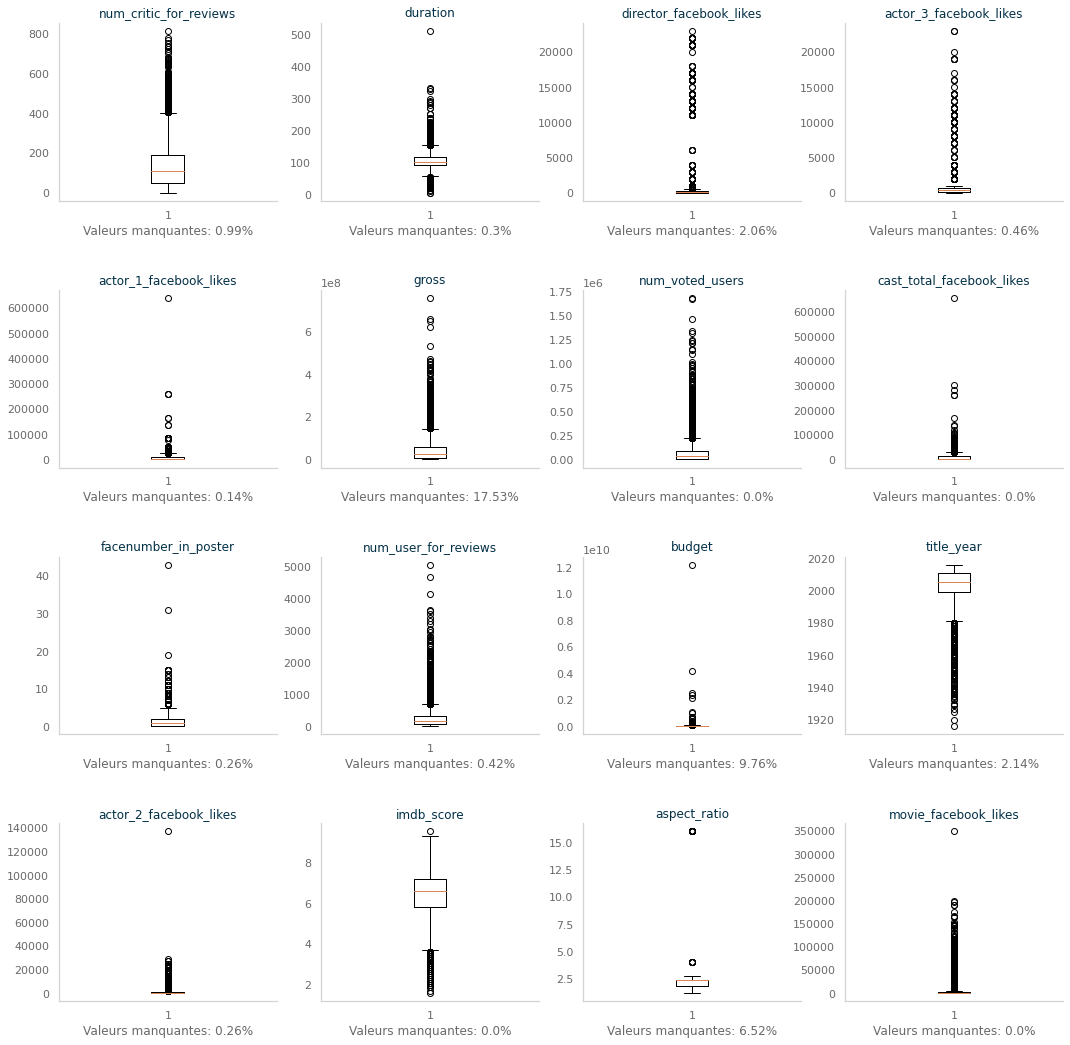

In [25]:
plt.rcParams["figure.figsize"] = (60,20)

fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(18,18))
plt.subplots_adjust(hspace=.5)
axes=axes.flatten()

i=0
for x in colonnesQuantitatives:
        #print(x) #debug
        # on dessine le boxplot en excluant les valeurs manquantes pour chaque variable quantitative
        axes[i].boxplot(dfUnique[x].dropna())
        axes[i].set_title(x,color='#023047')
        axes[i].set_xlabel('Valeurs manquantes: '+str(sPourcentageValeursManquantes[x])+'%')
        i+=1

### <font color=#ffb703>Histogrammes</font>

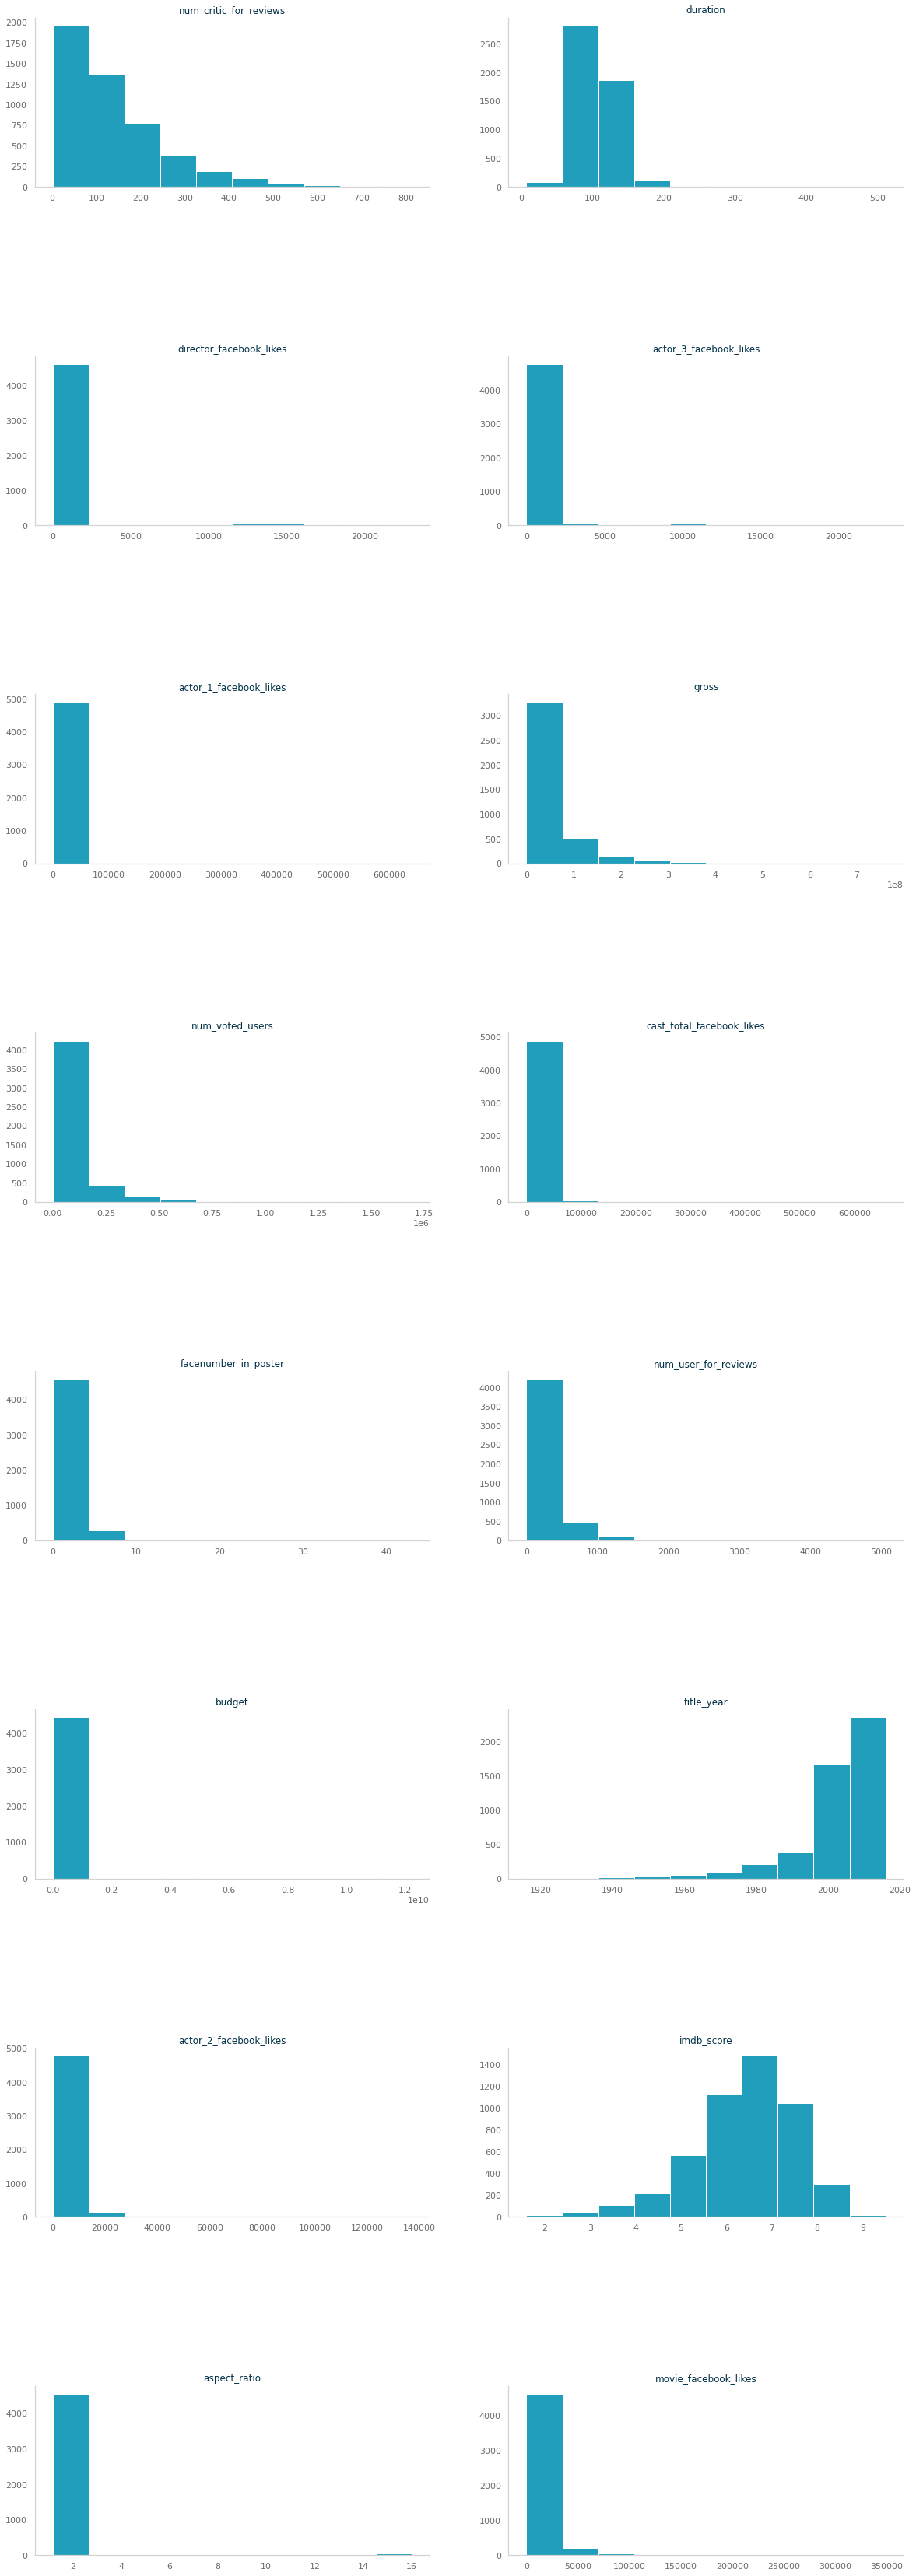

In [26]:
# Valeurs Quantitatives
plt.rcParams["figure.figsize"] = (80,60)

fig, axes = plt.subplots(nrows=8, ncols=2,figsize=(20,60))

# axes est un tableau à 2 dimensions: lignes, colonnes
# pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
axes=axes.flatten()

# espace vertical entre les rangées de sous graphiques
plt.subplots_adjust(hspace=1)

i=0
for x in colonnesQuantitatives:    
    axes[i].hist(dfUnique[x],color='#219ebc')
    axes[i].set_title(x,color='#023047')

    i=i+1

plt.show()

On note une distribution quasi normale de 'imdb_score'
On exclut l'aspect_ratio de notre etude car peu determinant dans le choix de film

In [27]:
del dfCleaned['aspect_ratio']
colonnesQuantitatives.remove('aspect_ratio')

In [28]:
# fonction mode qui agrege les variables qui sont sous un seuil 'threshold'(pour les très gros dataframe qui ont du mal à plotter)
def summarizeFrequenciesDf(df,threshold):
    dfFrequencies=df.value_counts(normalize=True) # frequence normalisée des valeurs de chaque variable
    mask = dfFrequencies>threshold # masque sur les fréquences > seuil
    dfTail= dfFrequencies.loc[~mask].sum()
    dfFrequencies=dfFrequencies.loc[mask] # filtre sur les fréquences < seuil
    dfFrequencies['autres']=dfTail # ajout des fréquences > seuil agregées dans la categorie 'Autre'
    return pd.DataFrame(dfFrequencies)

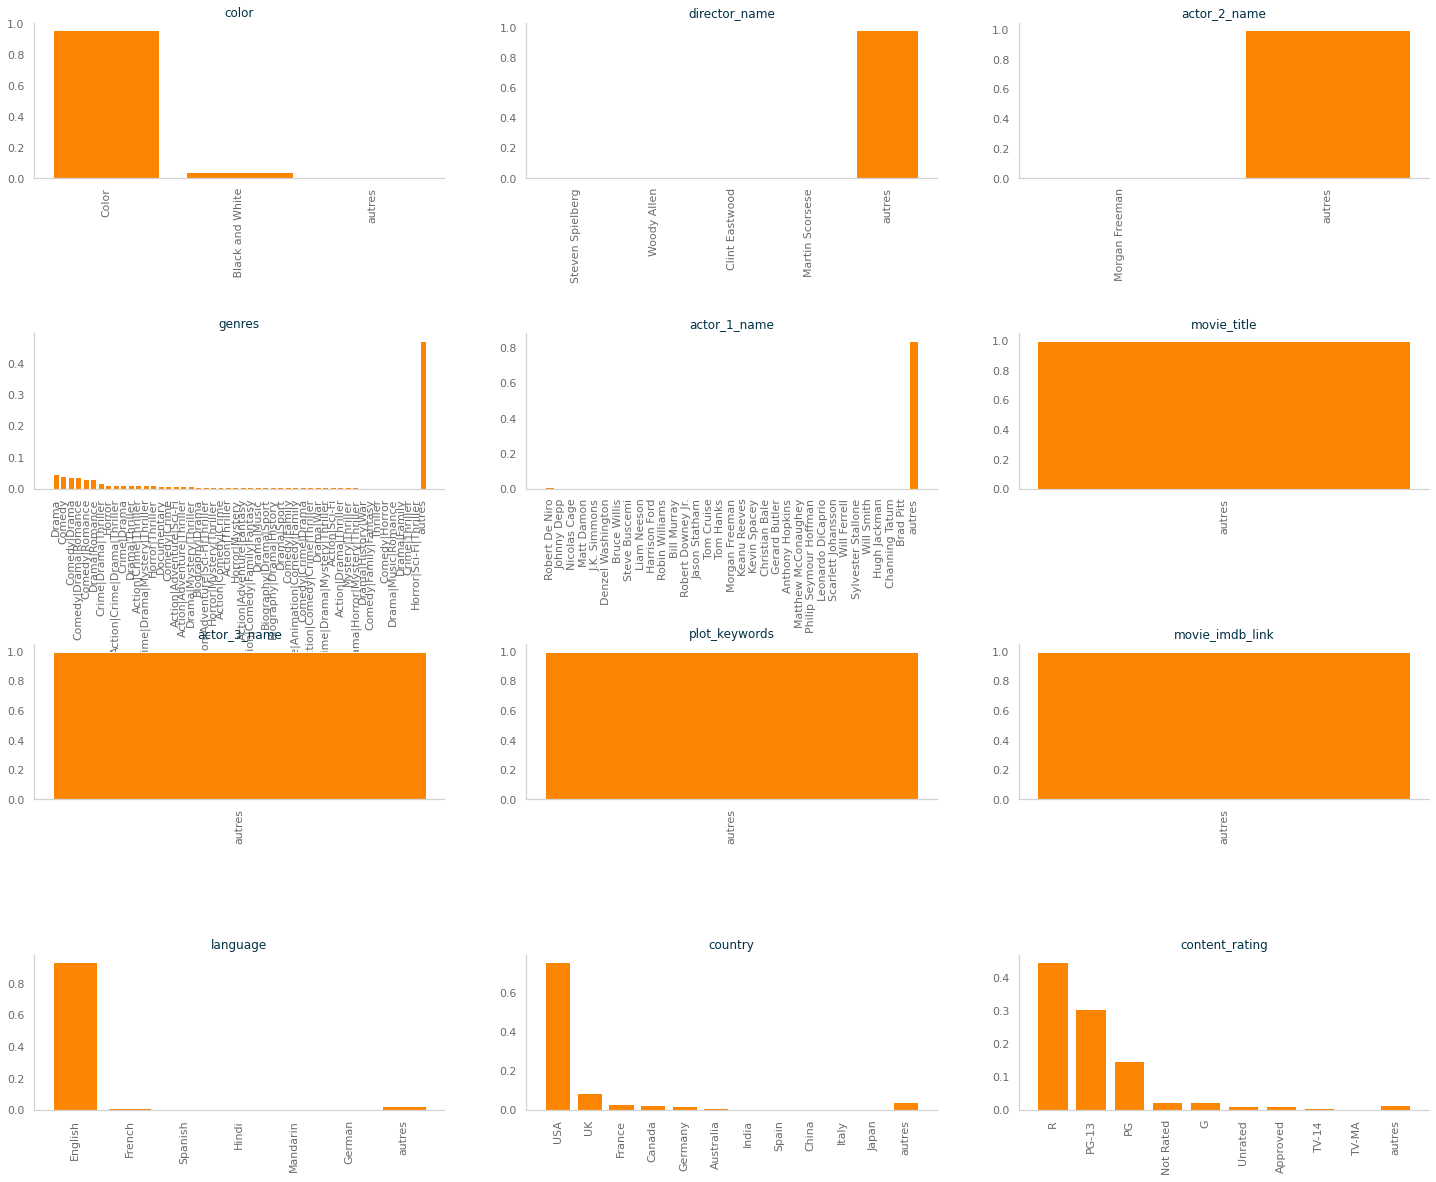

In [29]:
# Valeurs Qualitatives

plt.rcParams["figure.figsize"] = (100,40)
#plt.rcParams['font.size'] = '7.0'

fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(25,20))

# axes est un tableau à 2 dimensions: lignes, colonnes
# pour parcourir les subplot, il faut réduire axes à une dimension avec flatten
axes=axes.flatten()

# espace vertical entre les rangées de sous graphiques
plt.subplots_adjust(hspace=1)
# initialisation du compteur
i=0
for x in colonnesQualitatives:
    # passe les labels sur l'axe des x en arriere plan
    axes[i].xaxis.label.set_visible(False)
    
    dfCourant=summarizeFrequenciesDf(dfUnique[x],0.0035)

    axes[i].bar(dfCourant[x].index,dfCourant[x],color='#fb8500')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(x,color='#023047')

    i=i+1

#fig.suptitle("Données Qualitatives - Mode", fontsize=14)
plt.show()

On supprimera les variables:
* movie_imdb_link (unicité avec movie_title)
* language (majoritairement anglais, donc critere de differenciation peu determinant)
* country (majoritairement USA, donc critere de differenciation peu determinant)
* content_rating (classification peu parlante pour un francophone)
* color (majoritairement color, donc critere de differenciation peu determinant)

In [30]:
dfCleaned=dfCleaned.drop(['movie_imdb_link','language','country','content_rating','color'], axis=1)

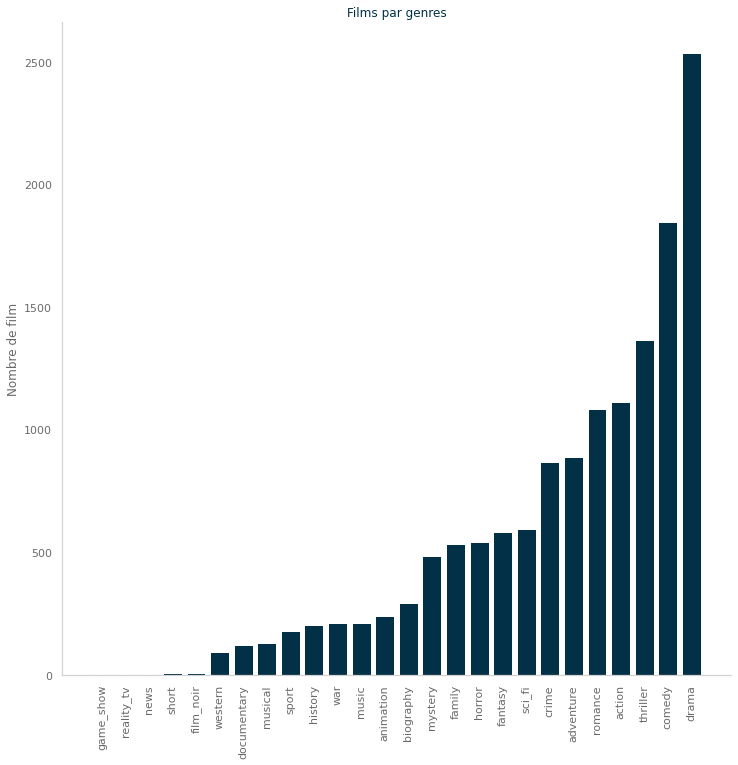

In [31]:
# Répartition des films par genre

dfGenresTries=dfGenres.sum().sort_values()

plt.rcParams["figure.figsize"] = (12,12)

dfGenresTries=dfGenres.sum().sort_values()
plt.xticks(rotation='vertical')
plt.bar(dfGenresTries.index,dfGenresTries,color='#023047')
plt.ylabel('Nombre de film')
plt.title('Films par genres',color='#023047')

plt.show()

=> on exclue les genres 'game_show', 'reality_tv', 'news' qui ne caracterisent que tres peu de films

In [32]:
dfGenres=dfGenres.drop(['game_show', 'reality_tv', 'news'],axis=1)

In [33]:
pd.set_option('display.min_rows', 20) 
dfPlotCounts=dfPlots.sum(axis=0).sort_values()
total=dfPlotCounts.values.sum()

In [34]:
mask = dfPlotCounts>30 # masque sur les plots qui apparaissent dans plus de X films
dfTail=dfPlotCounts[~mask]
dfFrequencies=dfPlotCounts.loc[mask] # filtre sur les fréquences < seuil
#dfFrequencies

In [35]:
dfPlotCounts

librarian            1
identity_theft       1
iceman               1
serial_murderer      1
iceberg              1
ice_storm            1
ice_skater           1
ice_pick             1
idiot                1
ice_hockey           1
                  ... 
boy                 71
alien               80
high_school         88
new_york_city       91
police             125
death              129
nan                152
murder             157
friend             164
love               191
Length: 8112, dtype: int64

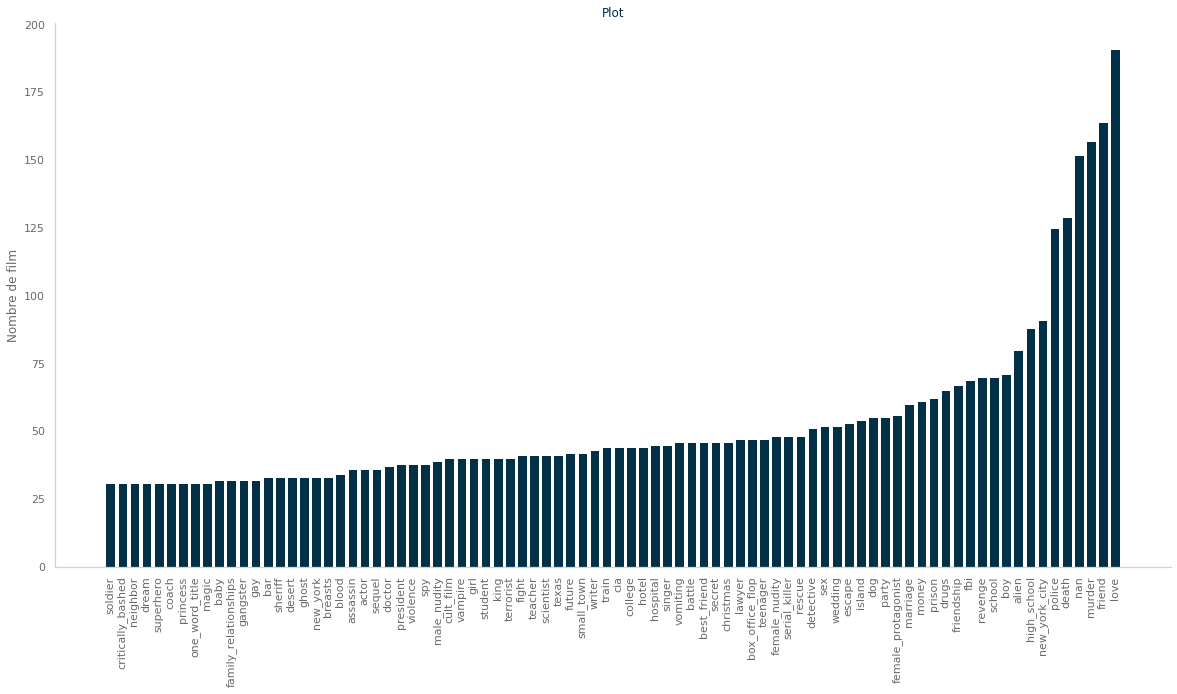

In [36]:
# Répartition des films par plot
plt.rcParams["figure.figsize"] = (20,10)

plt.xticks(rotation='vertical')
plt.ylabel('Nombre de film')
plt.bar(dfFrequencies.index,dfFrequencies,color='#023047')
plt.title('Plot',color='#023047')

plt.show()

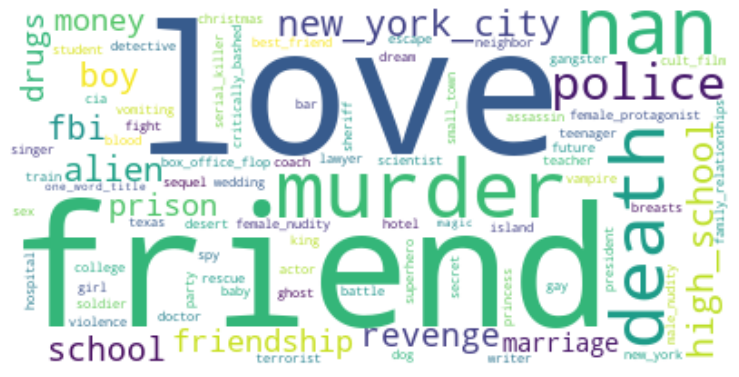

In [37]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
wordcloud = WordCloud(max_words=1000000,background_color="white").generate_from_frequencies(dfFrequencies)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

=> On ne gardera que les plots significatif qui designent plus de 40 films

In [38]:
dfPlots=dfPlots[dfFrequencies.index]

### <font color=#ffb703>Correlations</font>

In [39]:
matriceCorrelation=(dfCleaned.dropna()).corr()
matriceCorrelation.style.background_gradient(cmap='coolwarm').set_precision(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.00,0.23,0.18,0.25,0.17,0.46,0.60,0.24,-0.03,0.57,0.10,0.39,0.26,0.35,0.70
duration,0.23,1.00,0.18,0.12,0.09,0.24,0.34,0.12,0.03,0.35,0.07,-0.14,0.13,0.36,0.22
director_facebook_likes,0.18,0.18,1.00,0.12,0.09,0.14,0.31,0.12,-0.05,0.23,0.02,-0.05,0.12,0.19,0.17
actor_3_facebook_likes,0.25,0.12,0.12,1.00,0.25,0.28,0.26,0.48,0.11,0.21,0.04,0.11,0.54,0.07,0.27
actor_1_facebook_likes,0.17,0.09,0.09,0.25,1.00,0.14,0.18,0.95,0.06,0.13,0.02,0.09,0.39,0.09,0.13
gross,0.46,0.24,0.14,0.28,0.14,1.00,0.63,0.23,-0.03,0.55,0.10,0.04,0.24,0.21,0.36
num_voted_users,0.60,0.34,0.31,0.26,0.18,0.63,1.00,0.25,-0.03,0.79,0.07,0.01,0.24,0.48,0.52
cast_total_facebook_likes,0.24,0.12,0.12,0.48,0.95,0.23,0.25,1.00,0.09,0.18,0.03,0.12,0.64,0.11,0.20
facenumber_in_poster,-0.03,0.03,-0.05,0.11,0.06,-0.03,-0.03,0.09,1.00,-0.08,-0.02,0.07,0.07,-0.07,0.01
num_user_for_reviews,0.57,0.35,0.23,0.21,0.13,0.55,0.79,0.18,-0.08,1.00,0.07,0.01,0.19,0.32,0.38


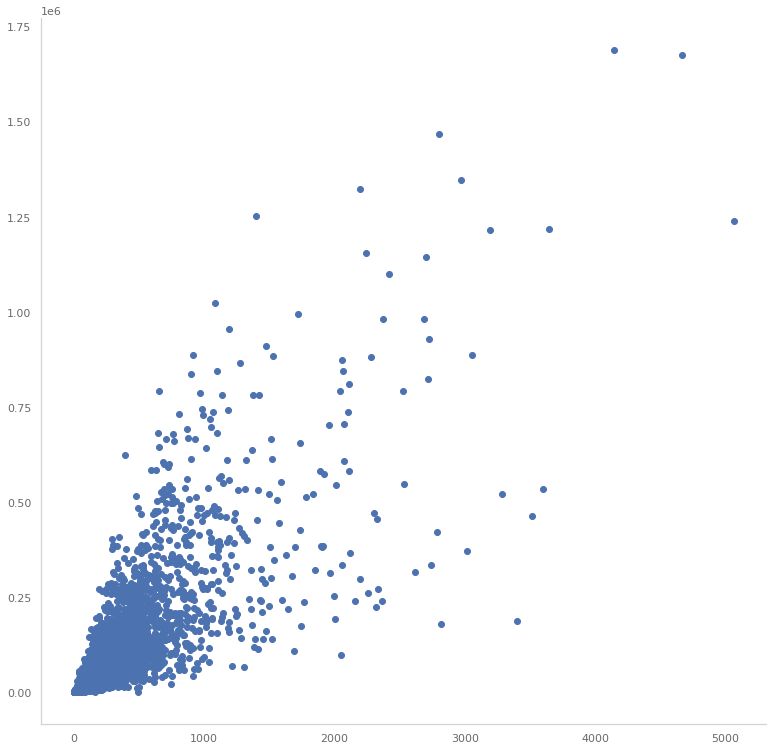

In [40]:
plt.scatter(dfCleaned[colonnesQuantitatives]['num_user_for_reviews'],dfCleaned[colonnesQuantitatives]['num_voted_users'])

In [41]:
import statsmodels.api as sm
dfComplete=dfCleaned.dropna()
X=dfComplete[colonnesQuantitatives]['cast_total_facebook_likes']

# ajout de la constante
X=sm.add_constant(X)

y=dfComplete[colonnesQuantitatives]['actor_1_facebook_likes']

model=sm.OLS(y,X)

results=model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actor_1_facebook_likes   R-squared:                       0.897
Model:                                OLS   Adj. R-squared:                  0.897
Method:                     Least Squares   F-statistic:                 3.275e+04
Date:                    Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                            13:41:06   Log-Likelihood:                -37457.
No. Observations:                    3772   AIC:                         7.492e+04
Df Residuals:                        3770   BIC:                         7.493e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Remarques:
* R^2 proche de 0,9 , score significatif
* la variable cast_total_facebook_likes explique 77% de la variable actor_1_facebook_likes avec une p-value à 0 (qui confirme l'hypothese alternative que le coefficient est different de 0)
* taux de valeurs manquantes de cast_total_facebook_likes (0%) < taux de valeurs manquantes de actor_1_facebook_likes (14%)

=> on exclue la variable cast_total_facebook_likes de notre etude

In [42]:
del dfCleaned['cast_total_facebook_likes']
colonnesQuantitatives.remove('cast_total_facebook_likes')

In [43]:
import statsmodels.api as sm
dfComplete=dfCleaned.dropna()
X=dfComplete[colonnesQuantitatives]['num_user_for_reviews']

# ajout de la constante
X=sm.add_constant(X)

y=dfComplete[colonnesQuantitatives]['num_voted_users']

model=sm.OLS(y,X)

results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        num_voted_users   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     6090.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:41:06   Log-Likelihood:                -48512.
No. Observations:                3772   AIC:                         9.703e+04
Df Residuals:                    3770   BIC:                         9.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7038.5906 

Remarques:
* R^2 proche de 0,6 , score peu significatif

=> le score R^2 n'est pas suffisamment signicatif: on va garder num_user_for_reviews et num_voted_users dans notre etude

In [44]:
dfCleaned.update(dfQualitativesUniformisees)

## <font color=#fb8500>Ecriture des donnees</font>

In [45]:
dfFrequencies.index

Index(['soldier', 'critically_bashed', 'neighbor', 'dream', 'superhero',
       'coach', 'princess', 'one_word_title', 'magic', 'baby',
       'family_relationships', 'gangster', 'gay', 'bar', 'sheriff', 'desert',
       'ghost', 'new_york', 'breasts', 'blood', 'assassin', 'actor', 'sequel',
       'doctor', 'president', 'violence', 'spy', 'male_nudity', 'cult_film',
       'vampire', 'girl', 'student', 'king', 'terrorist', 'fight', 'teacher',
       'scientist', 'texas', 'future', 'small_town', 'writer', 'train', 'cia',
       'college', 'hotel', 'hospital', 'singer', 'vomiting', 'battle',
       'best_friend', 'secret', 'christmas', 'lawyer', 'box_office_flop',
       'teenager', 'female_nudity', 'serial_killer', 'rescue', 'detective',
       'sex', 'wedding', 'escape', 'island', 'dog', 'party',
       'female_protagonist', 'marriage', 'money', 'prison', 'drugs',
       'friendship', 'fbi', 'revenge', 'school', 'boy', 'alien', 'high_school',
       'new_york_city', 'police', 'death',

In [46]:
dfCleaned.to_csv('movie_metadata_clean.csv',index=False)
dfPlots[dfFrequencies.index].to_csv('movie_plots.csv',index=False)
dfGenres.to_csv('movie_genres.csv',index=False)

In [47]:
now=time.time()
now-start

17.38360285758972

## <font color=#fb8500>Reste a faire</font>

* supprimer de dfCleaned (en argumentant): => FAIT
    * les variables correlees
    * la variable imdb_movie_link
    * language
    * content_rating
    * color
    * aspect_ratio
* supprimer les plots minoritaires de dfPlots => FAIT
* supprimer les genres < 40 de dfGenres => Fait
* ajouter une conclusion d'analyse à chaque chapitre => FAIT